# Customer Churn Analysis - Part 1: Data Exploration

**Project**: Customer Churn Prediction  
**Notebook**: 01 - Exploratory Data Analysis  
**Author**: Yunjae Jung 
**Date**: January 2026
 
## Objectives
- Load and understand the dataset
- Perform initial data quality checks
- Conduct exploratory data analysis
- Identify patterns and insights related to churn
- Visualize key relationships

## 1. Setup & Imports


In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✓ Libraries imported successfully
Pandas version: 2.3.2
NumPy version: 2.3.3


## 2. Load Data

In [2]:
# Define paths
DATA_DIR = Path('../data')
RAW_DATA = DATA_DIR / 'raw' / 'telco_churn.csv'

# Create directories if they don't exist
DATA_DIR.mkdir(exist_ok=True)
(DATA_DIR / 'raw').mkdir(exist_ok=True)
(DATA_DIR / 'processed').mkdir(exist_ok=True)

# Load the dataset
df = pd.read_csv(RAW_DATA)

## 3. Initial Data Inspection

In [3]:
# First look at the data
print("First 10 rows:")
print("=" * 80)
df.head(10)

# Dataset info
print("\nDataset Information:")
print("=" * 80)
df.info()

# Statistical summary
print("\nStatistical Summary:")
print("=" * 80)
df.describe()

# Check data types
print("\nData Types:")
print("=" * 80)
print(df.dtypes.value_counts())

First 10 rows:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

## 4. Data Quality Assessment

In [4]:
# Check for TotalCharges data type issue (common in this dataset)
print("Checking TotalCharges column...")
print(f"Data type: {df['TotalCharges'].dtype}")

# TotalCharges might be object instead of float due to spaces
if df['TotalCharges'].dtype == 'object':
    print("⚠️  TotalCharges is object type - converting to numeric")
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print(f"✓ Converted to: {df['TotalCharges'].dtype}")

# Missing values
print("\nMissing Values Analysis:")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✓ No missing values found!")
else:
    print(f"\n⚠️  Found {missing_df['Missing Count'].sum()} missing values")
    # Fill TotalCharges missing values with 0 (likely new customers)
    if df['TotalCharges'].isnull().sum() > 0:
        df['TotalCharges'].fillna(0, inplace=True)
        print("✓ Filled TotalCharges missing values with 0")

# Duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() == 0:
    print("✓ No duplicates found!")

# Unique values per column
print("\nUnique Values per Column:")
print("=" * 80)
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

Checking TotalCharges column...
Data type: object
⚠️  TotalCharges is object type - converting to numeric
✓ Converted to: float64

Missing Values Analysis:
              Missing Count  Percentage
TotalCharges             11    0.156183

⚠️  Found 11 missing values
✓ Filled TotalCharges missing values with 0

Duplicate rows: 0
✓ No duplicates found!

Unique Values per Column:
customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
DeviceProtection       3
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
gender                 2
PhoneService           2
PaperlessBilling       2
Dependents             2
Partner                2
SeniorCitizen          2
Churn                  2
dtype: int64


## 5. Target Variable Analysis

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%
Retention Rate: 73.46%


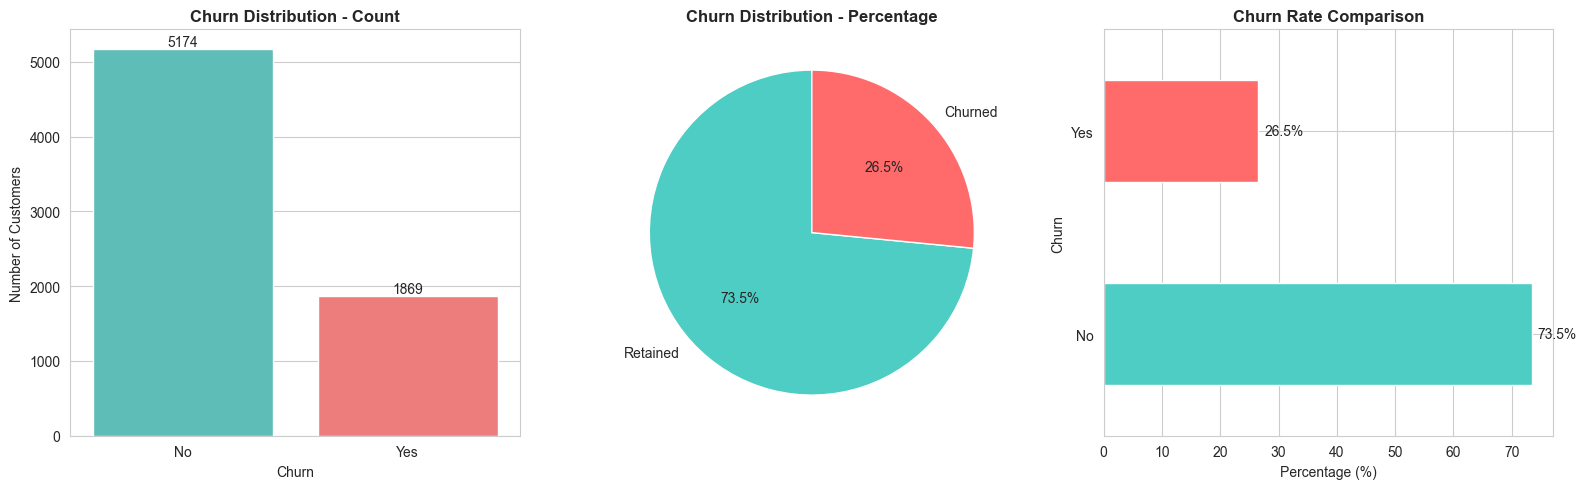


💡 KEY INSIGHT: Class imbalance present (~26.5% churn rate)


In [5]:
# Churn distribution
churn_counts = df['Churn'].value_counts()
churn_rate = (df['Churn'] == 'Yes').sum() / len(df) * 100

print("Churn Distribution:")
print("=" * 80)
print(churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")
print(f"Retention Rate: {100-churn_rate:.2f}%")

# Visualize churn distribution
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Count plot
sns.countplot(data=df, x='Churn', palette=['#4ecdc4', '#ff6b6b'], ax=axes[0])
axes[0].set_title('Churn Distribution - Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Customers')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#4ecdc4', '#ff6b6b']
axes[1].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Churn Distribution - Percentage', fontsize=12, fontweight='bold')

# Percentage bar
churn_pct = df['Churn'].value_counts(normalize=True) * 100
churn_pct.plot(kind='barh', ax=axes[2], color=colors)
axes[2].set_title('Churn Rate Comparison', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Percentage (%)')
for i, v in enumerate(churn_pct):
    axes[2].text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHT: Class imbalance present (~{churn_rate:.1f}% churn rate)")

## 6. Categorical Features Analysis

In [6]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Categorical Features ({len(categorical_cols)}):")
print(categorical_cols)

# Churn rate by categorical features
print("\nChurn Rate by Categorical Features:")
print("=" * 80)

for col in categorical_cols[:5]:  # Show first 5
    churn_by_cat = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(f"\n{col}:")
    print(churn_by_cat)

Categorical Features (15):
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Churn Rate by Categorical Features:

gender:
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

Partner:
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903

Dependents:
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237

PhoneService:
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637

MultipleLines:
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone

### 6.1 Contract Type Analysis

Churn Rate by Contract Type:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


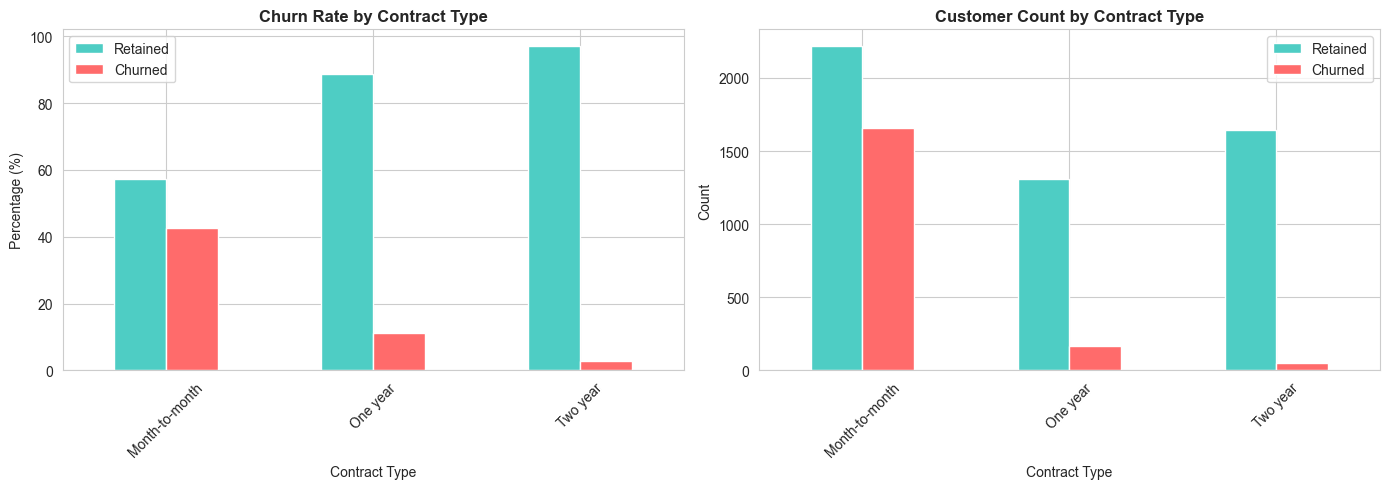


💡 KEY FINDING #1: Month-to-month contracts show MUCH higher churn!
   → Recommendation: Incentivize annual contracts


In [7]:
# Deep dive: Contract Type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

print("Churn Rate by Contract Type:")
print("=" * 80)
print(contract_churn)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
contract_churn.plot(kind='bar', stacked=False, ax=axes[0], color=['#4ecdc4', '#ff6b6b'])
axes[0].set_title('Churn Rate by Contract Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Percentage (%)')
axes[0].legend(['Retained', 'Churned'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Count plot
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', ax=axes[1], color=['#4ecdc4', '#ff6b6b'])
axes[1].set_title('Customer Count by Contract Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Count')
axes[1].legend(['Retained', 'Churned'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

print("\n💡 KEY FINDING #1: Month-to-month contracts show MUCH higher churn!")
print("   → Recommendation: Incentivize annual contracts")


### 6.2 Internet Service Analysis

Churn Rate by Internet Service:
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


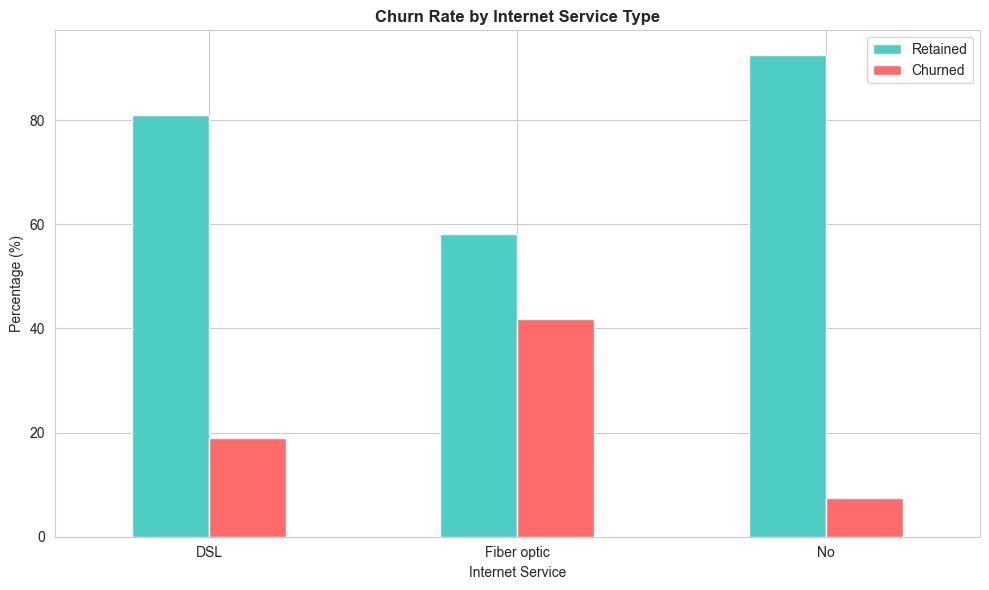

In [8]:
# Internet Service impact
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

print("Churn Rate by Internet Service:")
print("=" * 80)
print(internet_churn)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
internet_churn.plot(kind='bar', ax=ax, color=['#4ecdc4', '#ff6b6b'])
ax.set_title('Churn Rate by Internet Service Type', fontsize=12, fontweight='bold')
ax.set_xlabel('Internet Service')
ax.set_ylabel('Percentage (%)')
ax.legend(['Retained', 'Churned'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

### 6.3 Payment Method Analysis

Churn Rate by Payment Method:
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


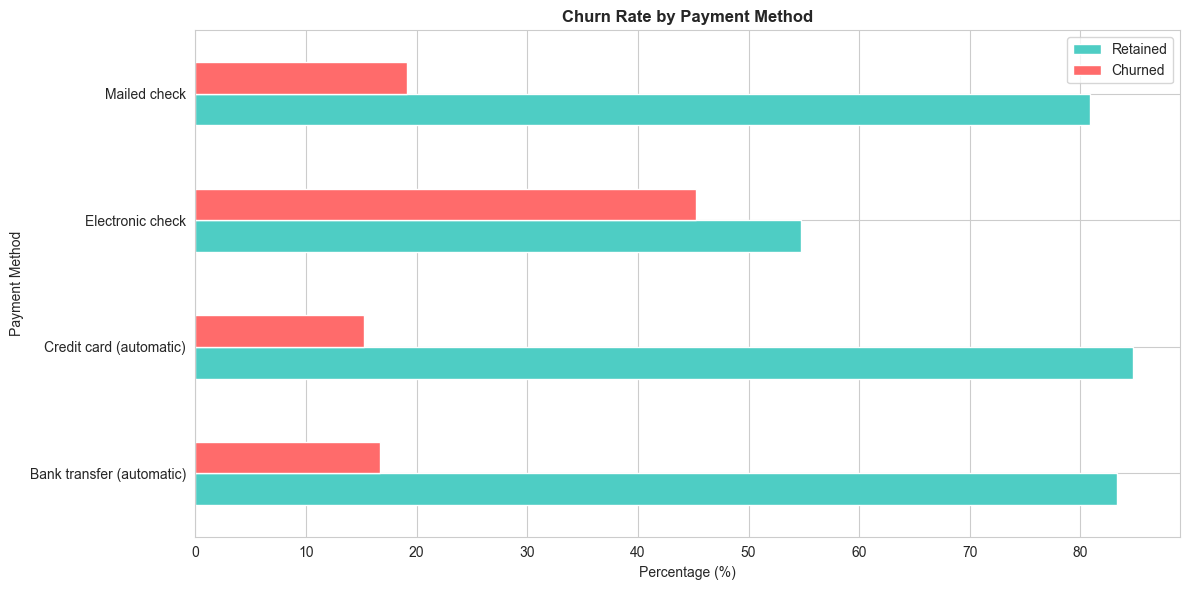

In [9]:
# Payment method impact
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

print("Churn Rate by Payment Method:")
print("=" * 80)
print(payment_churn.round(2))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
payment_churn.plot(kind='barh', ax=ax, color=['#4ecdc4', '#ff6b6b'])
ax.set_title('Churn Rate by Payment Method', fontsize=12, fontweight='bold')
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Payment Method')
ax.legend(['Retained', 'Churned'])
plt.tight_layout()
plt.show()

## 7. Numerical Features Analysis

In [10]:
# Numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Numerical Features Summary:")
print("=" * 80)
df[numerical_cols].describe()

Numerical Features Summary:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### 7.1 Tenure Analysis

Churn Rate by Tenure Group:
tenure_group
0-12 months     47.678161
12-24 months    28.710938
24-48 months    20.388959
48+ months       9.513176
Name: Churn, dtype: float64


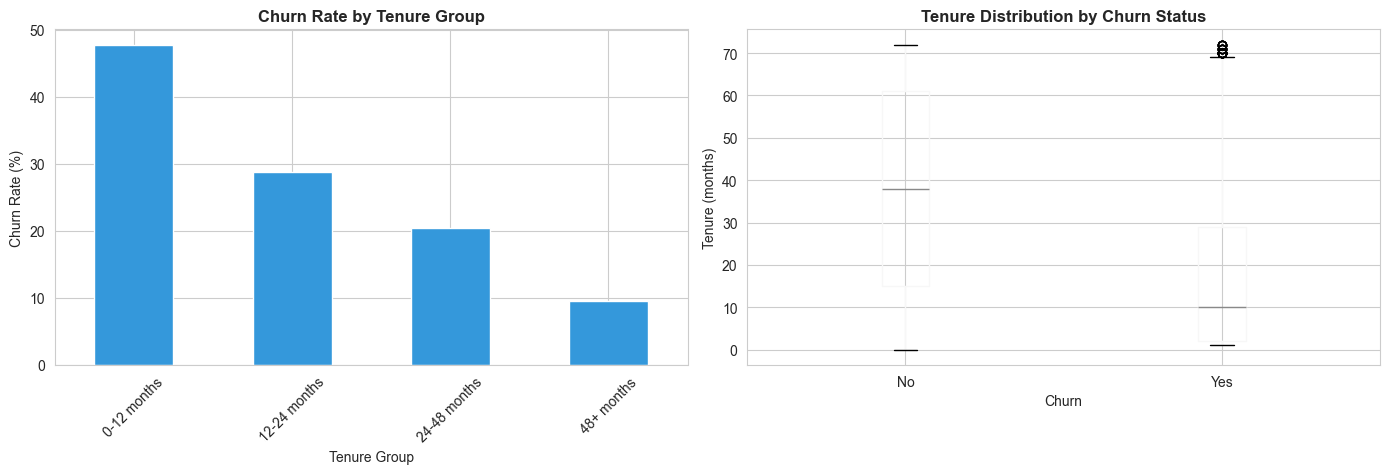


💡 KEY FINDING #2: New customers (0-12 months) have highest churn risk!
   → Recommendation: Enhanced onboarding program


In [11]:
# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], 
                            bins=[0, 12, 24, 48, 72],
                            labels=['0-12 months', '12-24 months', '24-48 months', '48+ months'])

tenure_churn = df.groupby('tenure_group')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)

print("Churn Rate by Tenure Group:")
print("=" * 80)
print(tenure_churn)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by tenure group
tenure_churn.plot(kind='bar', ax=axes[0], color='#3498db')
axes[0].set_title('Churn Rate by Tenure Group', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tenure Group')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Distribution of tenure
df.boxplot(column='tenure', by='Churn', ax=axes[1])
axes[1].set_title('Tenure Distribution by Churn Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Tenure (months)')
plt.suptitle('')

plt.tight_layout()
plt.show()

print("\n💡 KEY FINDING #2: New customers (0-12 months) have highest churn risk!")
print("   → Recommendation: Enhanced onboarding program")


### 7.2 Monthly Charges Analysis

Monthly Charges Comparison:
Churned customers:
  Mean: $74.44
  Median: $79.65

Retained customers:
  Mean: $61.27
  Median: $64.43

Difference: $13.18


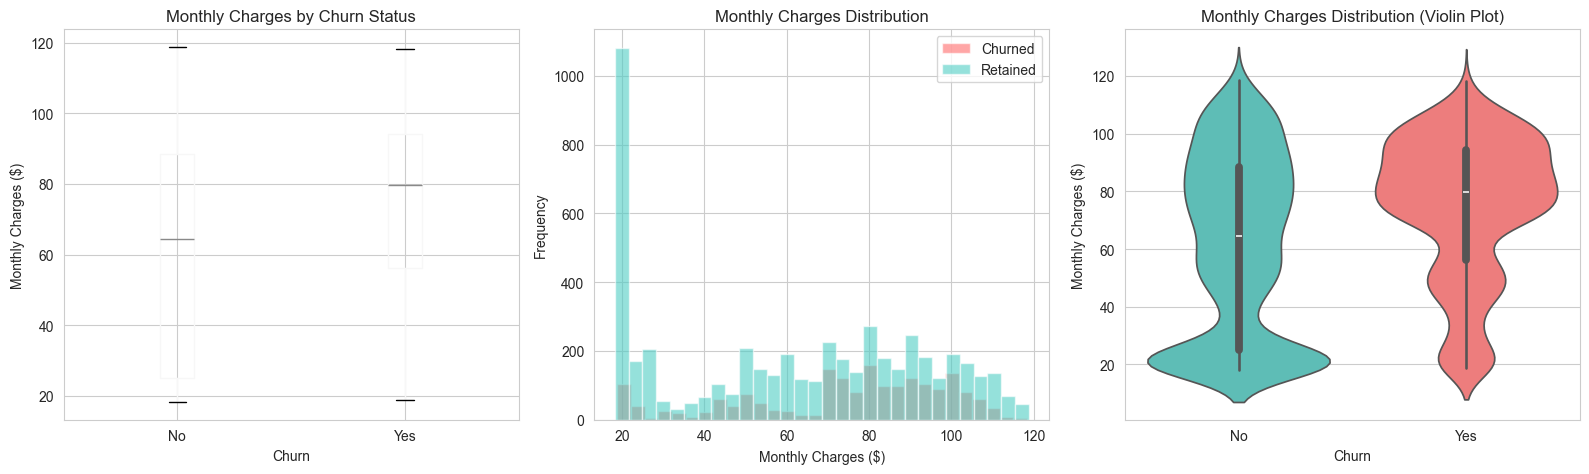


💡 KEY FINDING #3: Churned customers pay MORE on average!
   → Recommendation: Review pricing strategy and value proposition


In [12]:
# Compare charges between churned and retained
churned_charges = df[df['Churn'] == 'Yes']['MonthlyCharges']
retained_charges = df[df['Churn'] == 'No']['MonthlyCharges']

print("Monthly Charges Comparison:")
print("=" * 80)
print(f"Churned customers:")
print(f"  Mean: ${churned_charges.mean():.2f}")
print(f"  Median: ${churned_charges.median():.2f}")
print(f"\nRetained customers:")
print(f"  Mean: ${retained_charges.mean():.2f}")
print(f"  Median: ${retained_charges.median():.2f}")
print(f"\nDifference: ${churned_charges.mean() - retained_charges.mean():.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Box plot
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[0])
axes[0].set_title('Monthly Charges by Churn Status')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges ($)')
plt.suptitle('')

# Histogram
axes[1].hist(churned_charges, alpha=0.6, label='Churned', bins=30, color='#ff6b6b')
axes[1].hist(retained_charges, alpha=0.6, label='Retained', bins=30, color='#4ecdc4')
axes[1].set_title('Monthly Charges Distribution')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Violin plot
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette=['#4ecdc4', '#ff6b6b'], ax=axes[2])
axes[2].set_title('Monthly Charges Distribution (Violin Plot)')
axes[2].set_ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

print("\n💡 KEY FINDING #3: Churned customers pay MORE on average!")
print("   → Recommendation: Review pricing strategy and value proposition")


### 7.3 Total Charges Analysis

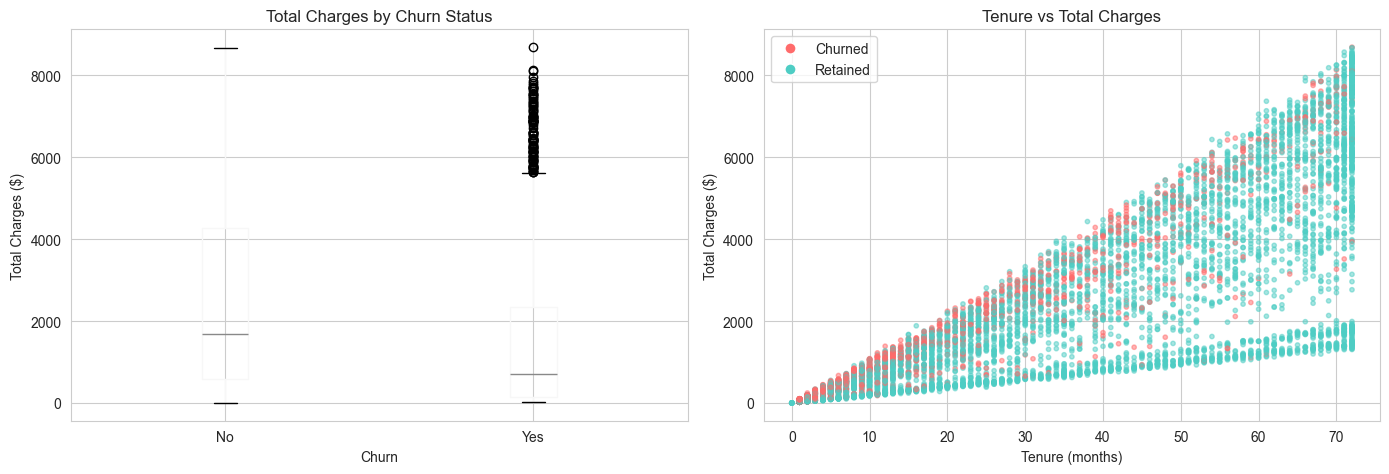

In [13]:
# Total charges comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df.boxplot(column='TotalCharges', by='Churn', ax=axes[0])
axes[0].set_title('Total Charges by Churn Status')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Total Charges ($)')
plt.suptitle('')

# Scatter: Tenure vs Total Charges
colors = df['Churn'].map({'Yes': '#ff6b6b', 'No': '#4ecdc4'})
axes[1].scatter(df['tenure'], df['TotalCharges'], c=colors, alpha=0.5, s=10)
axes[1].set_title('Tenure vs Total Charges')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Total Charges ($)')
axes[1].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff6b6b', markersize=8, label='Churned'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4ecdc4', markersize=8, label='Retained')
])

plt.tight_layout()
plt.show()

## 8. Service Features Analysis

Churn Rate by Service Usage:

OnlineSecurity:
Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194

OnlineBackup:
Churn                       No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494

DeviceProtection:
Churn                       No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064

TechSupport:
Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341

StreamingTV:
Churn                       No        Yes
StreamingT

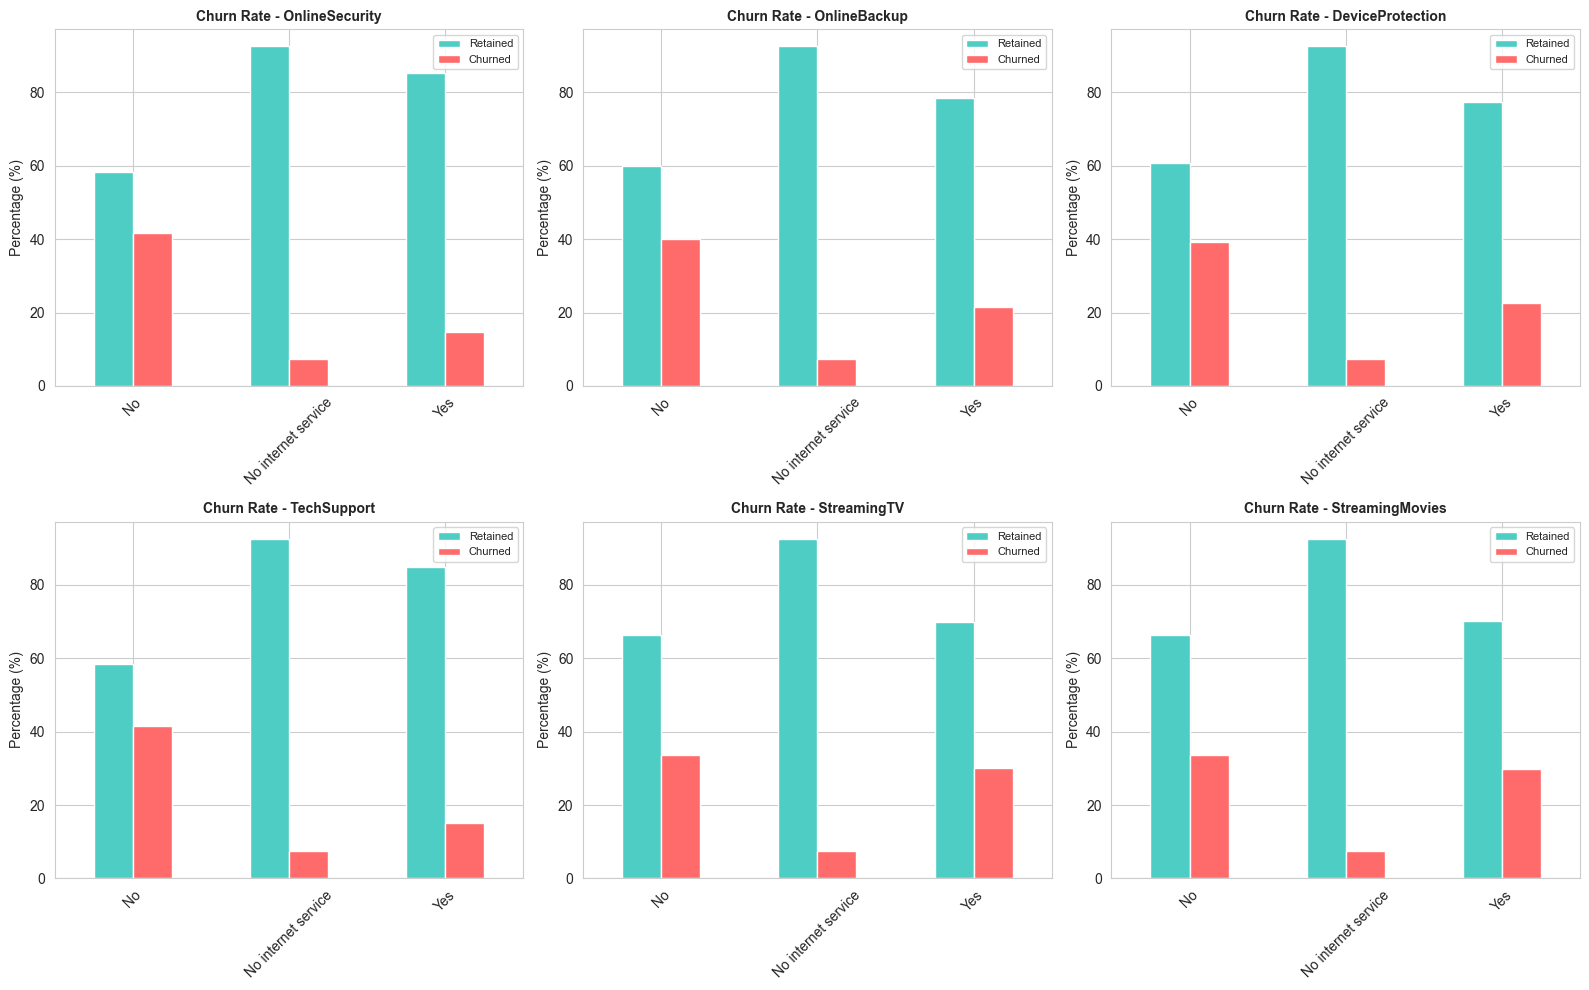

In [14]:
# Analyze add-on services
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']

print("Churn Rate by Service Usage:")
print("=" * 80)

for service in service_cols:
    service_churn = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    print(f"\n{service}:")
    print(service_churn)

# Visualize service impact
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, service in enumerate(service_cols):
    service_churn = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    service_churn.plot(kind='bar', ax=axes[idx], color=['#4ecdc4', '#ff6b6b'])
    axes[idx].set_title(f'Churn Rate - {service}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['Retained', 'Churned'], fontsize=8)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Correlation Analysis

Correlation Analysis - Numerical Features:

Correlation with Churn (Numerical Features):
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64


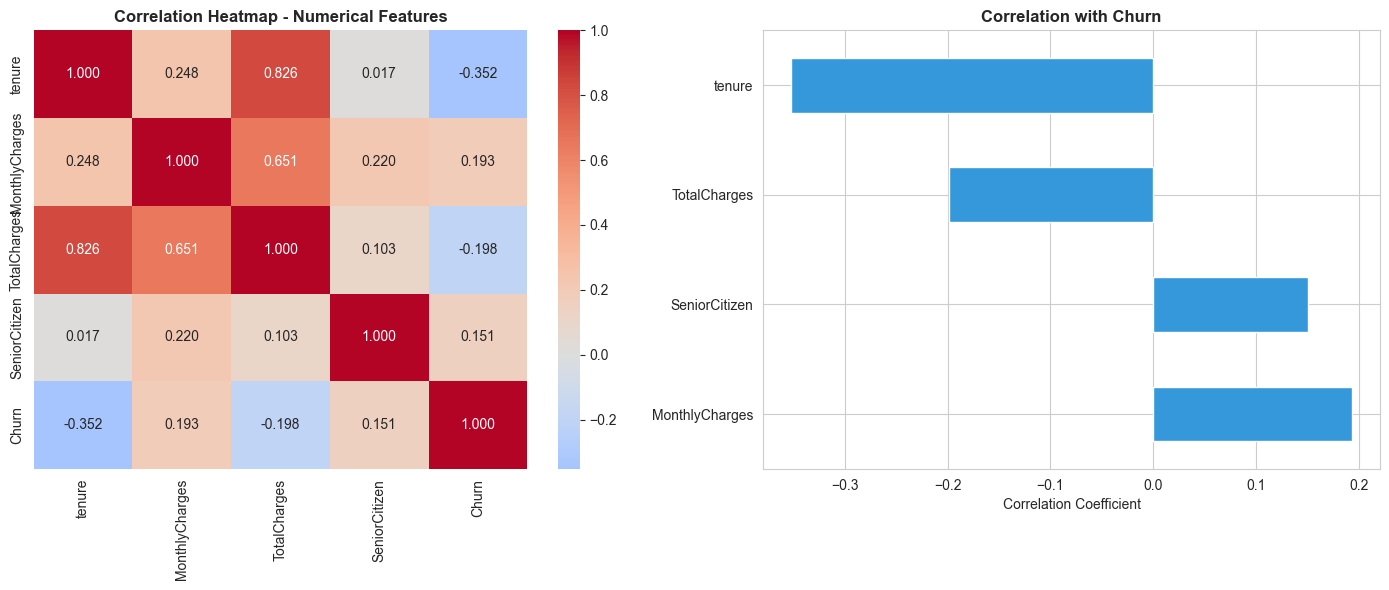

In [15]:
# Prepare data for correlation (numerical features only first)
print("Correlation Analysis - Numerical Features:")
print("=" * 80)

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
df_num = df[numerical_features + ['Churn']].copy()

# Convert Churn to binary
df_num['Churn'] = (df_num['Churn'] == 'Yes').astype(int)

# Calculate correlation
correlation_matrix = df_num.corr()
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)

print("\nCorrelation with Churn (Numerical Features):")
print(churn_corr)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0], fmt='.3f')
axes[0].set_title('Correlation Heatmap - Numerical Features', fontsize=12, fontweight='bold')

# Bar chart
churn_corr[churn_corr.index != 'Churn'].plot(kind='barh', ax=axes[1], color='#3498db')
axes[1].set_title('Correlation with Churn', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()


## 10. Multi-dimensional Analysis

Churn Rate by Contract Type and Tenure:
Churn                            No    Yes
Contract       tenure_group               
Month-to-month 0-12 months    48.65  51.35
               12-24 months   62.28  37.72
               24-48 months   67.08  32.92
               48+ months     73.98  26.02
One year       0-12 months    89.43  10.57
               12-24 months   91.88   8.12
               24-48 months   89.38  10.62
               48+ months     87.07  12.93
Two year       0-12 months   100.00   0.00
               12-24 months  100.00   0.00
               24-48 months   97.81   2.19
               48+ months     96.67   3.33


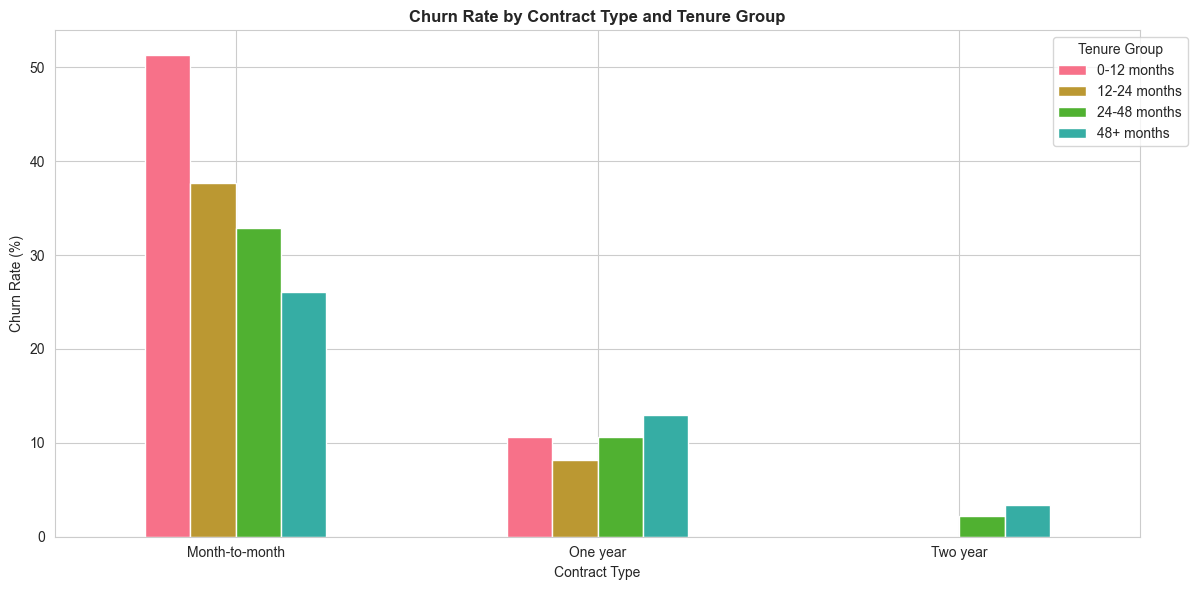

In [16]:
# Contract + Tenure + Churn
pivot_table = pd.crosstab([df['Contract'], df['tenure_group']], 
                          df['Churn'], 
                          normalize='index') * 100

print("Churn Rate by Contract Type and Tenure:")
print("=" * 80)
print(pivot_table.round(2))

# Visualize
pivot_table['Yes'].unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Churn Rate by Contract Type and Tenure Group', fontsize=12, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Tenure Group', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 11. Summary of Key Findings

In [17]:
print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

print("\n1️⃣ CONTRACT TYPE - Strongest Predictor")
mtm_churn = contract_churn.loc['Month-to-month', 'Yes']
two_year_churn = contract_churn.loc['Two year', 'Yes']
print(f"   • Month-to-month: {mtm_churn:.1f}% churn rate")
print(f"   • Two-year: {two_year_churn:.1f}% churn rate")
print(f"   • Difference: {mtm_churn - two_year_churn:.1f}x higher!")
print("   → Action: Incentivize long-term contracts")

print("\n2️⃣ TENURE - Critical First Year")
first_year_churn = tenure_churn.iloc[0]
print(f"   • 0-12 months: {first_year_churn:.1f}% churn rate")
print("   • Churn decreases with tenure")
print("   → Action: Enhanced onboarding & early engagement")

print("\n3️⃣ PRICING - Value Perception Issue")
print(f"   • Churned customers: ${churned_charges.mean():.2f}/month")
print(f"   • Retained customers: ${retained_charges.mean():.2f}/month")
print(f"   • Difference: ${churned_charges.mean() - retained_charges.mean():.2f} more")
print("   → Action: Review pricing strategy")

print("\n4️⃣ INTERNET SERVICE")
fiber_churn = internet_churn.loc['Fiber optic', 'Yes']
print(f"   • Fiber optic: {fiber_churn:.1f}% churn rate")
print("   • Service type impacts churn")
print("   → Action: Service-specific retention strategies")

print("\n5️⃣ PAYMENT METHOD")
elec_churn = payment_churn.loc['Electronic check', 'Yes']
print(f"   • Electronic check: {elec_churn:.1f}% churn rate")
print("   • Automatic payments show lower churn")
print("   → Action: Promote automatic payment methods")


KEY FINDINGS SUMMARY

1️⃣ CONTRACT TYPE - Strongest Predictor
   • Month-to-month: 42.7% churn rate
   • Two-year: 2.8% churn rate
   • Difference: 39.9x higher!
   → Action: Incentivize long-term contracts

2️⃣ TENURE - Critical First Year
   • 0-12 months: 47.7% churn rate
   • Churn decreases with tenure
   → Action: Enhanced onboarding & early engagement

3️⃣ PRICING - Value Perception Issue
   • Churned customers: $74.44/month
   • Retained customers: $61.27/month
   • Difference: $13.18 more
   → Action: Review pricing strategy

4️⃣ INTERNET SERVICE
   • Fiber optic: 41.9% churn rate
   • Service type impacts churn
   → Action: Service-specific retention strategies

5️⃣ PAYMENT METHOD
   • Electronic check: 45.3% churn rate
   • Automatic payments show lower churn
   → Action: Promote automatic payment methods


## 12. Save Processed Data

In [18]:
# Save for next notebook
output_path = DATA_DIR / 'processed' / 'data_after_eda.csv'
df.to_csv(output_path, index=False)
print(f"✓ Data saved to: {output_path}")
print(f"   Shape: {df.shape}")
print(f"   Includes tenure_group column")

✓ Data saved to: ../data/processed/data_after_eda.csv
   Shape: (7043, 22)
   Includes tenure_group column
